In [1]:
#sun density function

In [2]:
#  Imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
import math
from jupyterthemes import jtplot
jtplot.style(theme="gruvboxl", context="notebook", ticks=True, grid=False)
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline

R_sun=6.957e10 # cm------------




In [3]:
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)

In [2]:
class paths:
    def __init__(self, H, r):
        self.h= H
        self.R_sun = r
    
    """""
    the flight length of cosmic rays and corresponding radial heights from centre of sun
    entered at zenith angle 0 
    
    Paramter:
    ------------------------------------
    h height from centre , R_sun float
    
    Return:
    ------------------------------------
    2*l list , radii(h,theta)  list
    
    """""
    
    def scales(self):
        #change limits according to the theta becasue not always the r is supposed to be like this!!!!!!!
        R=self.R_sun
        angle=np.linspace(0,np.arccos(self.h/R),1000)
        l=self.h*np.tan(angle)
        radii=self.h/np.cos(angle)
    
        return 2*l , radii
    
    
       
    """""
    returns density function of sun
    
    parameters:
    -------------------------
    r=R/R_sun float
    
    returns:
    -------------------------
    rho_sun float
    
    """""
    def rho_sun(self):
        x=self.scales()[1]
        y=519*x**4 -1630*x**3 +1844*x**2 -889*x + 155 #  gm/cm^3 -    https://spacemath.gsfc.nasa.gov/Calculus/6Page102.pdf-------------------
        return y
        
    def X(self):
        
        tmp_angle=np.linspace(0,np.arccos(self.h/r))
        RHS=np.trapz(self.rho_sun(),)

In [3]:
"""""
here I found a data file from 
https://users-phys.au.dk/jcd/solar_models/ 
which was cited at 
https://solarscience.msfc.nasa.gov/interior.shtml
for interior of the sun 
"""""

'""\nhere I found a data file from \nhttps://users-phys.au.dk/jcd/solar_models/ \nwhich was cited at \nhttps://solarscience.msfc.nasa.gov/interior.shtml\nfor interior of the sun \n'

In [4]:
a=paths(2,4)

In [5]:
a.scales()

(array([0.00000000e+00, 4.19298472e-03, 8.38597866e-03, 1.25789910e-02,
        1.67720310e-02, 2.09651079e-02, 2.51582309e-02, 2.93514091e-02,
        3.35446518e-02, 3.77379683e-02, 4.19313677e-02, 4.61248593e-02,
        5.03184522e-02, 5.45121558e-02, 5.87059792e-02, 6.28999316e-02,
        6.70940223e-02, 7.12882604e-02, 7.54826553e-02, 7.96772161e-02,
        8.38719521e-02, 8.80668725e-02, 9.22619866e-02, 9.64573035e-02,
        1.00652832e-01, 1.04848583e-01, 1.09044564e-01, 1.13240784e-01,
        1.17437254e-01, 1.21633982e-01, 1.25830978e-01, 1.30028250e-01,
        1.34225809e-01, 1.38423663e-01, 1.42621821e-01, 1.46820293e-01,
        1.51019089e-01, 1.55218216e-01, 1.59417686e-01, 1.63617506e-01,
        1.67817686e-01, 1.72018236e-01, 1.76219165e-01, 1.80420481e-01,
        1.84622195e-01, 1.88824316e-01, 1.93026852e-01, 1.97229814e-01,
        2.01433210e-01, 2.05637050e-01, 2.09841343e-01, 2.14046098e-01,
        2.18251325e-01, 2.22457033e-01, 2.26663232e-01, 2.308699

In [6]:

def rho_sun(x,a,b,c,d,e,f,g,h):
    y=a*x**7 +b*x**6 +c*x**5 +d*x**4+e*x**3+f*x**2+g*x+h 
    #  gm/cm^3 -    https://spacemath.gsfc.nasa.gov/Calculus/6Page102.pdf-------------------
    return y

In [7]:
def rho_poly(x,coeff_list):
    poly = np.poly1d(coeff_list)
    return poly(x)

In [8]:
def rho_exp(x,amp,o):
    y=amp*math.exp(o*x)
    return y
    

In [9]:
r=np.linspace(0,1,1000)
#rho_sun(np.array(rr),10,9,8,7,6)

In [10]:
pp=np.vectorize(rho_exp)

In [4]:

import codecs
file = codecs.open('/home/kruteesh/Desktop/Solar_neutrinos/rho.txt', 'r', 'UTF-8')
print(file)

In [5]:
tline = file.readlines()


In [6]:
b=tline[5:]

In [7]:
rr=[]
rho=[]
c=[]
for i in b:
    rr.append(float(i.split(' ')[1]))

    rho.append(float(i.split(' ')[3]))
    

In [8]:
def f(x):
    return 10**(2.2009-4.3*x)

In [64]:
y=np.vectorize(f)

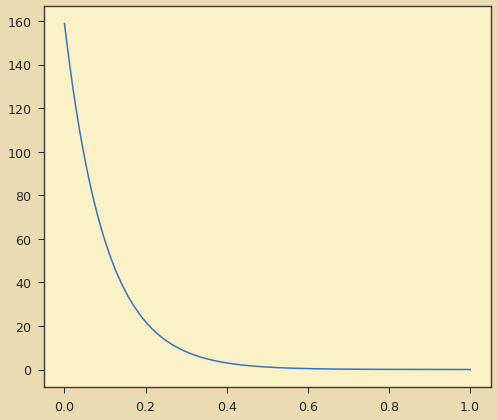

In [65]:
plt.plot(rr,y(rr))

In [26]:
np.array(rr)

array([1.0007126, 1.0007047, 1.0006968, ..., 0.0014098, 0.0013911,
       0.       ])

In [27]:
b_exp, covar_exp = curve_fit(pp, np.array(rr), rho,[1,1])

In [28]:
best_vals,covar= curve_fit(rho_sun,rr,rho)

In [29]:
b_poly=np.polyfit(rr,rho,31)

/home/kruteesh/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
rr[2480]

0.0013911

In [31]:

amp=b_exp[0]
o=b_exp[1]

print(b_exp)


[166.21994657  -7.16400881]


In [32]:
a=best_vals[0]
b=best_vals[1]
c=best_vals[2]
d=best_vals[3]
e=best_vals[4]
f=best_vals[5]
g=best_vals[6]
h=best_vals[7]
print(best_vals)

[ 17814.46063496 -68672.59147368 105371.62108371 -80824.02597664
  31065.04854293  -4441.61666329   -469.75093592    157.20116507]


In [33]:
# Spline example
spline_test = UnivariateSpline(rr[::-1], rho[::-1], k=1, s=0, ext=0)

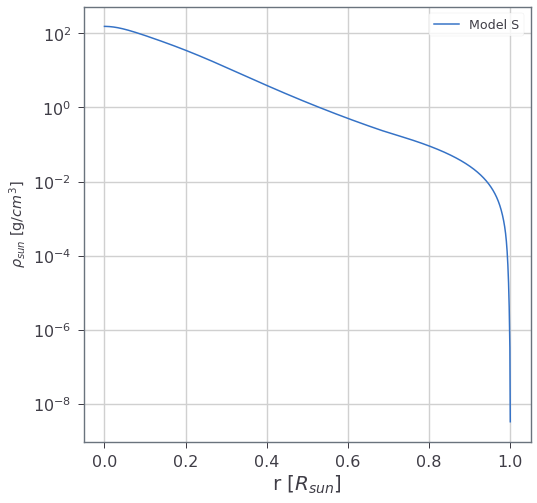

In [11]:

plt.figure(figsize=(8,8))
#plt.plot(rr,rho_sun(np.array(rr)[kk:tt],a,b,c,d,e,f,g,h),label='polynomial fit')
plt.plot(rr,rho,label='Model S')
#plt.plot(rr[kk:tt],pp(rr[kk:tt],amp,o),label='exponetial fit')
#plt.plot(rr[kk:tt], np.poly1d(b_poly)(rr[kk:tt]), label="Numpy Poly")
#plt.plot(rr[kk:tt], spline_test(rr[kk:tt]), label="Spline")
plt.yscale('log')
#plt.xlim((0.84,1))
#plt.ylim((-0.2,0.5))
plt.xlabel(r'r [$R_{sun}$]',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(r'$\rho_{sun}$ [g/$cm^3$]')
plt.legend()
plt.grid()

In [62]:
t=np.linspace(1.0007126,0,2482)

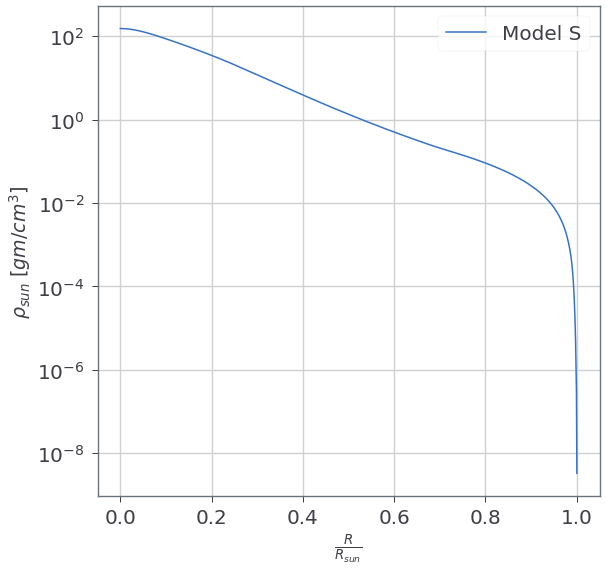

In [55]:
plt.figure(figsize=(9,9))
#plt.plot(rr,rho_sun(np.array(rr),a,b,c,d,e,f,g,h),label='paper fit')
plt.plot(rr,rho,label='Model S')
plt.xlabel(r'$\frac{R}{R_{sun}}$',fontsize=19)
plt.ylabel(r'$\rho_{sun}$ [$gm/cm^3$]',fontsize=19)
plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.savefig('/home/kruteesh/Desktop/Solar_neutrinos/diffsec/pics/rho_sun.jpg')


In [24]:
def rho_s(r):
    y=519*r**4 -1630*r**3 +1844*r**2 -889*r + 155 #  gm/cm^3 -    https://spacemath.gsfc.nasa.gov/Calculus/6Page102.pdf-------------------
    return y
    

In [25]:
def X(h,phi,dphi):
    """""
    X= integral rho * dl= integral rho(h,phi)*h*sec^2 phi dphi limit phi = 0 to arccos(h/r) the small
    r(some angle ) that would give a dX-->dr*? with constant h  


    """""
    phi_limit=np.arccos(h/R_sun)
  
    if phi<=np.arccos(h/(0.245*R_sun)):
        
        rh=np.linspace(rho_exp(h/np.cos(0),amp,o)*h/(np.cos(0)**2),
                       rho_exp(h/np.cos(phi),amp,o)*h/(np.cos(phi)**2),10)
        print('exp',h,h/np.cos(phi),np.arccos(h/(0.245*R_sun)))
       
    else:
        rh=np.linspace(rho_sun(h/np.cos(0),a,b,c,d,e,f,g,h)*h/(np.cos(0)**2),
                       rho_sun(h/np.cos(phi),a,b,c,d,e,f,g,h)*h/(np.cos(phi)**2),
                       10)
        print('poly fit,','cos(phi)=',np.cos(phi))
    x=np.sum(rh*dphi)
    
    
    
    
    
    
    return x,phi_limit

In [26]:
X(5.7e10,0.6,0.001)

poly fit, cos(phi)= 0.8253356149096783


<ipython-input-25-d2d820aaa4aa>:10: RuntimeWarning: invalid value encountered in arccos
  if phi<=np.arccos(h/(0.245*R_sun)):


(1.8084258323922916e+87, 0.6105746716332711)

In [27]:
def r2X():
    """""
    We need the formula for the rho to determin the form of this function. 
    
    Inorder to find rho_s(X) the X would be dependent on some phi X(phi),
    r(X) could be substituted into rho(r(X(phi)))
    
    """""